# Detecting Edges and Applying Image Filters

### Importing the libraries

In [1]:
import cv2
import numpy as np
from pylab import rcParams
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.pyplot import figure
from skimage import io
%matplotlib inline

### Importing sample Images

In [2]:
smile = plt.imread('sample_images/first_image.jpg')
grass = plt.imread('sample_images/second_image.jpg')
seals = plt.imread('sample_images/third_image.jpg')
pencils = plt.imread('sample_images/fourth_image.jpg')
campass = plt.imread('sample_images/campass.jpg')
summer = plt.imread('sample_images/summer.jpg')

### Kernels

In [3]:
kernel_zeros = np.array([[0,0,0], [0,0,0], [0,0,0]])
kernel_ones = np.array([[1,1,1], [1,1,1], [1,1,1]])
kernel_identity = np.array([[0,0,0], [0,1,0], [0,0,0]])
kernel_10x10 = np.ones((10,10), np.float32) / 100.0
kernel_20x20 = np.ones((20,20), np.float32) / 400.0

### Displaying Sample Images

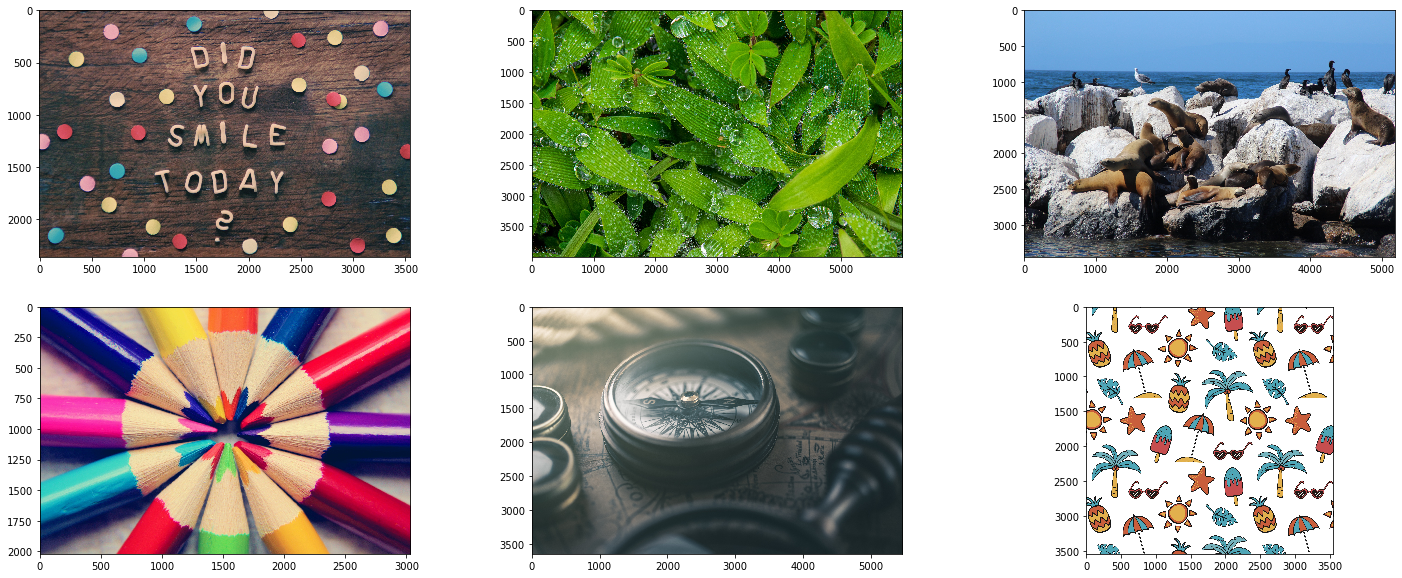

In [4]:
rcParams['figure.figsize'] = 25, 10

images_list = [smile, grass, seals, pencils, campass, summer]
for image_index in range(len(images_list)):
    subplot_index = image_index + 1
    plt.subplot(2, 3, subplot_index)
    plt.imshow(images_list[image_index])

### Blurring

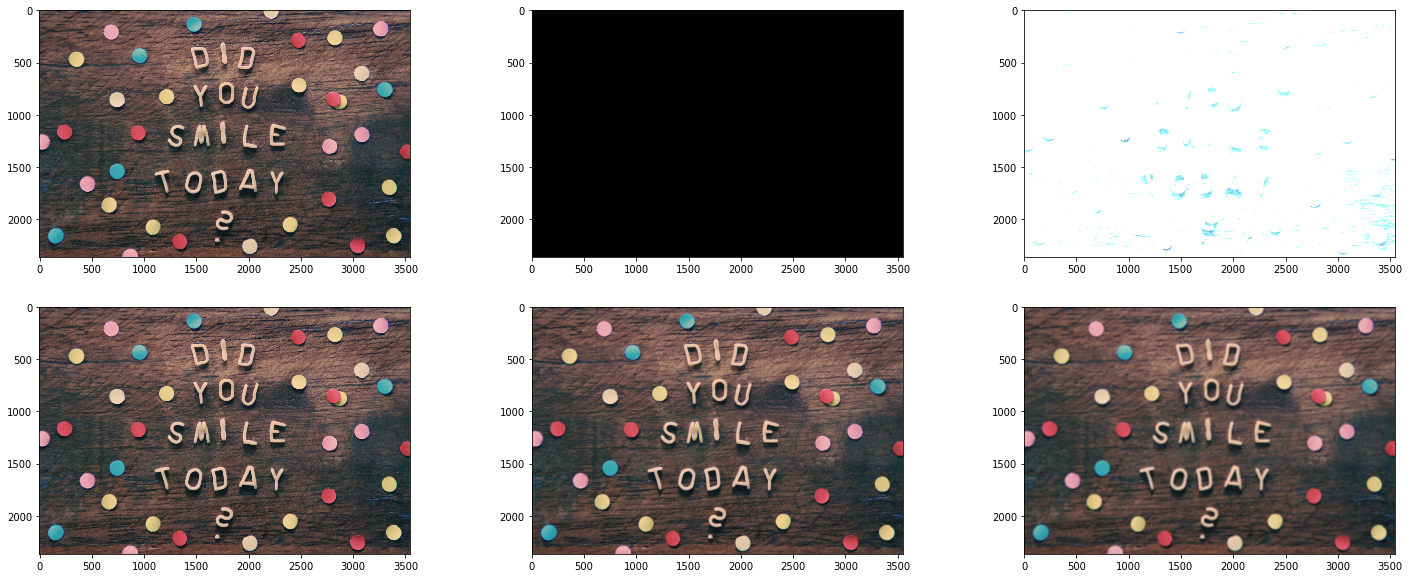

In [5]:
depth = -1
image_kernels = [1, kernel_zeros, kernel_ones, kernel_identity, kernel_10x10, kernel_20x20]
rcParams['figure.figsize'] = 25, 10

for image_index in range(len(image_kernels)):
    subplot_index = image_index + 1
    plt.subplot(2, 3, subplot_index)
    output = cv2.filter2D(smile, depth, image_kernels[image_index])
    plt.imshow(output)

### Checking the Depth

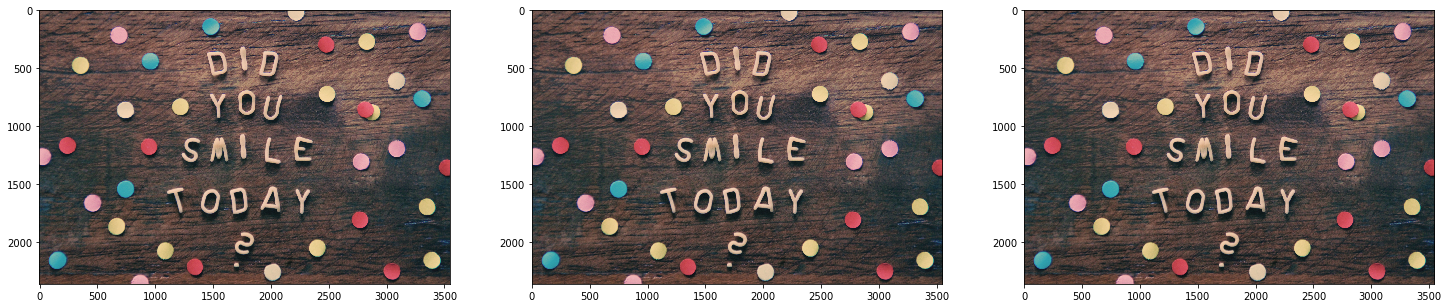

In [6]:
rcParams['figure.figsize'] = 25, 25
depth = -1
for image_index in range(3):
    subplot_index = image_index + 1
    plt.subplot(1, 3, subplot_index)
    output = cv2.filter2D(smile, depth, kernel_identity)
    plt.imshow(output)
    depth = depth - 30

### Edge Detection

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


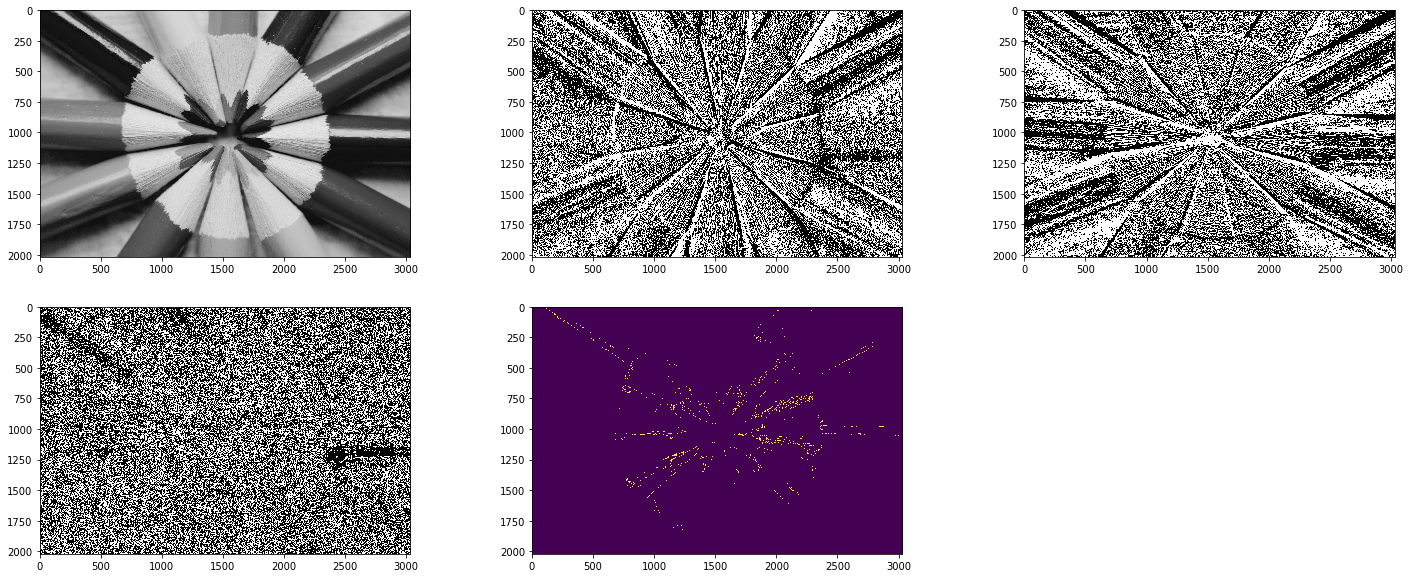

In [7]:
gray = cv2.imread('sample_images/fourth_grayscale.png')
sobel_horizontal = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
sobel_vertical = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
laplacian = cv2.Laplacian(gray, cv2.CV_64F)
canny = cv2.Canny(gray, 50, 240)

rcParams['figure.figsize'] = 25, 10

sobel_lists = [gray, sobel_horizontal, sobel_vertical, laplacian, canny]

for image_index in range(len(sobel_lists)):
    subplot_index = image_index + 1
    plt.subplot(2, 3, subplot_index)
    plt.imshow(sobel_lists[image_index])

### Motion Blurring

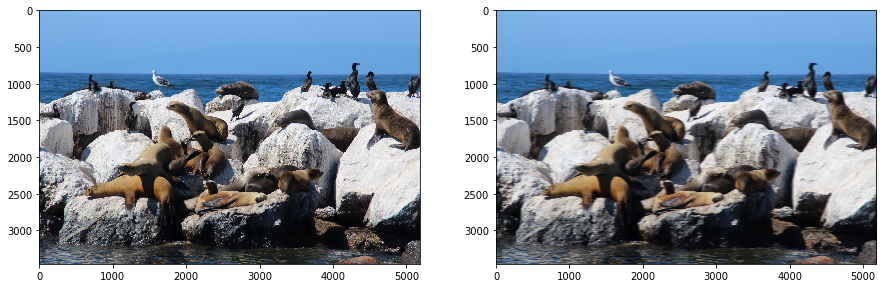

In [8]:
size = 35
# generating the kernel
rcParams['figure.figsize'] = 15, 10
kernel_motion_blur = np.zeros((size, size))
kernel_motion_blur[int((size-1)/2), :] = np.ones(size)
kernel_motion_blur = kernel_motion_blur / size

# applying the kernel to the input image
output = cv2.filter2D(seals, -1, kernel_motion_blur)
outputs = [seals, output]

for image_index in range(len(outputs)):
    subplot_index = image_index + 1
    plt.subplot(1, 2, subplot_index)
    plt.imshow(outputs[image_index])

### Sharpening

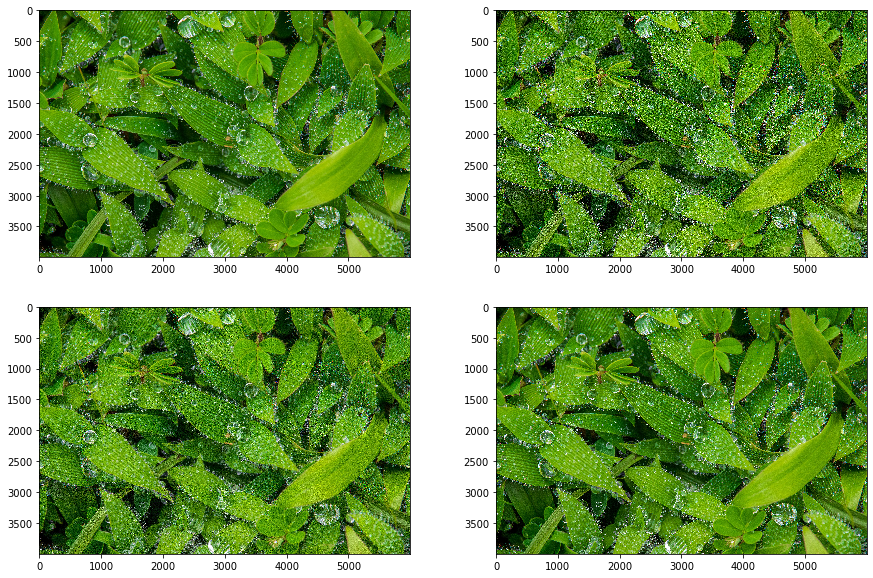

In [9]:
# generating the kernels
rcParams['figure.figsize'] = 15, 10
kernel_sharpen_1 = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
kernel_sharpen_2 = np.array([[1,1,1], [1,-7,1], [1,1,1]])
kernel_sharpen_3 = np.array([[-1,-1,-1,-1,-1],
 [-1,2,2,2,-1],
 [-1,2,8,2,-1],
 [-1,2,2,2,-1],
 [-1,-1,-1,-1,-1]]) / 8.0
# applying different kernels to the input image
output_1 = cv2.filter2D(grass, -1, kernel_sharpen_1)
output_2 = cv2.filter2D(grass, -1, kernel_sharpen_2)
output_3 = cv2.filter2D(grass, -1, kernel_sharpen_3)

outputs = [grass, output_1, output_2, output_3]

for image_index in range(len(outputs)):
    subplot_index = image_index + 1
    plt.subplot(2, 2, subplot_index)
    plt.imshow(outputs[image_index])

### Embrosing

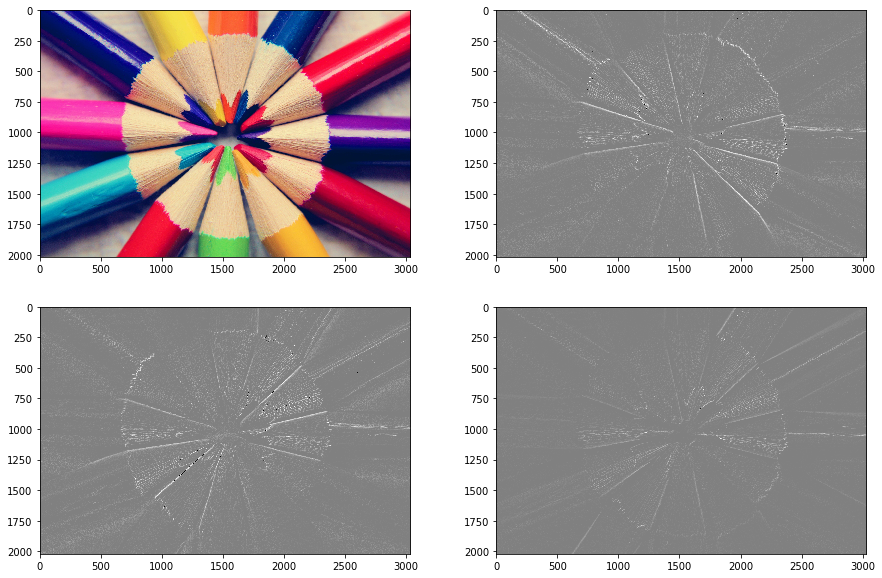

In [10]:
# generating the kernels
kernel_emboss_1 = np.array([[0,-1,-1],
 [1,0,-1],
 [1,1,0]])
kernel_emboss_2 = np.array([[-1,-1,0],
 [-1,0,1],
 [0,1,1]])
kernel_emboss_3 = np.array([[1,0,0],
 [0,0,0],
 [0,0,-1]])
# converting the image to grayscale
# applying the kernels to the grayscale image and adding the offset
output_1 = cv2.filter2D(gray, -1, kernel_emboss_1) + 128
output_2 = cv2.filter2D(gray, -1, kernel_emboss_2) + 128
output_3 = cv2.filter2D(gray, -1, kernel_emboss_3) + 128

outputs = [pencils, output_1, output_2, output_3]

for image_index in range(len(outputs)):
    subplot_index = image_index + 1
    plt.subplot(2, 2, subplot_index)
    plt.imshow(outputs[image_index])

### Erosion and dilation

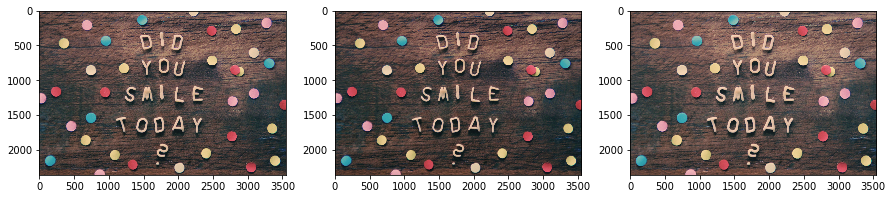

In [11]:
kernel = np.ones((5,5), np.uint8)
img_erosion = cv2.erode(smile, kernel, iterations=1)
img_dilation = cv2.dilate(smile, kernel, iterations=1)
outputs = [smile, img_erosion, img_dilation]

for image_index in range(len(outputs)):
    subplot_index = image_index + 1
    plt.subplot(1, 3, subplot_index)
    plt.imshow(outputs[image_index])

### Erosion and dilation II

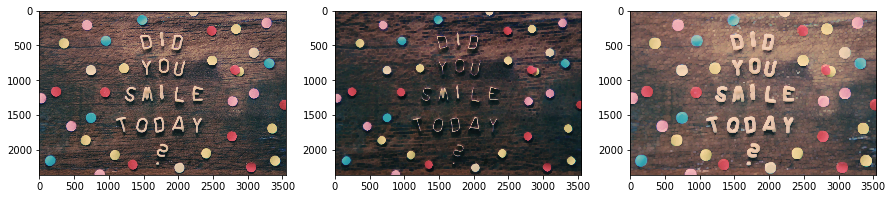

In [12]:
kernel = np.ones((5,5), np.uint8)
img_erosion = cv2.erode(smile, kernel, iterations=5)
img_dilation = cv2.dilate(smile, kernel, iterations=5)
outputs = [smile, img_erosion, img_dilation]

for image_index in range(len(outputs)):
    subplot_index = image_index + 1
    plt.subplot(1, 3, subplot_index)
    plt.imshow(outputs[image_index])

### Creating a vignette filter

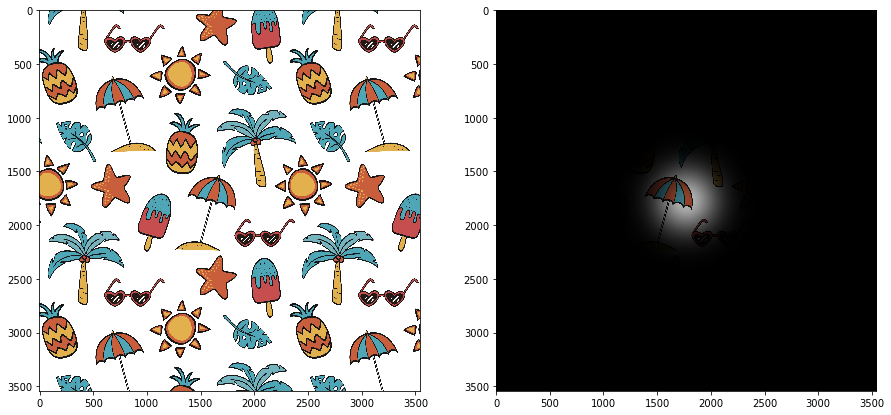

In [13]:
rows, cols = summer.shape[:2]
# generating vignette mask using Gaussian kernels
kernel_x = cv2.getGaussianKernel(cols,200)
kernel_y = cv2.getGaussianKernel(rows,200)

kernel = kernel_y * kernel_x.T
mask = 255 * kernel / np.linalg.norm(kernel)
output = np.copy(summer)
# applying the mask to each channel in the input image
for i in range(3):
 output[:,:,i] = output[:,:,i] * mask

outputs = [summer, output]

for image_index in range(len(outputs)):
    subplot_index = image_index + 1
    plt.subplot(1, 2, subplot_index)
    plt.imshow(outputs[image_index])

### move the focus around

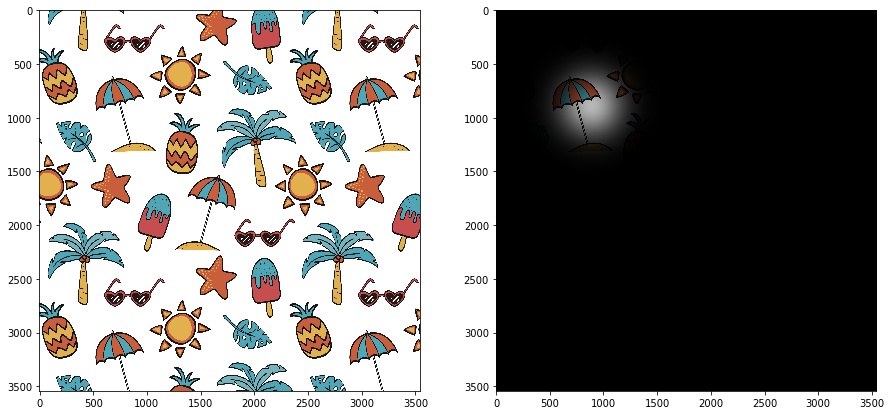

In [14]:
rows, cols = summer.shape[:2]
# generating vignette mask using Gaussian kernels
kernel_x = cv2.getGaussianKernel(int(1.5*cols),200)
kernel_y = cv2.getGaussianKernel(int(1.5*rows),200)
kernel = kernel_y * kernel_x.T
mask = 255 * kernel / np.linalg.norm(kernel)
mask = mask[int(0.5*rows):, int(0.5*cols):]
output = np.copy(summer)
# applying the mask to each channel in the input image
for i in range(3):
 output[:,:,i] = output[:,:,i] * mask

outputs = [summer, output]

for image_index in range(len(outputs)):
    subplot_index = image_index + 1
    plt.subplot(1, 2, subplot_index)
    plt.imshow(outputs[image_index])

### Enhancing the contrast in an image

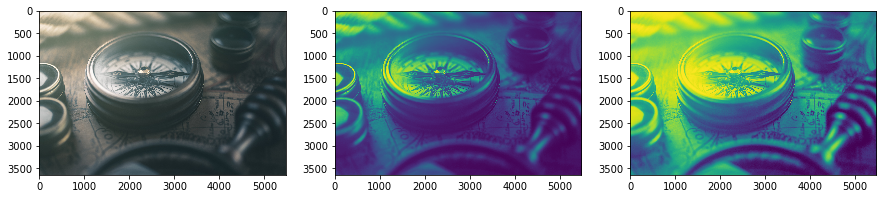

In [15]:
img = cv2.imread('sample_images/campass.jpg', 0)
histeq = cv2.equalizeHist(img)

outputs = [campass, img, histeq]

for image_index in range(len(outputs)):
    subplot_index = image_index + 1
    plt.subplot(1, 3, subplot_index)
    plt.imshow(outputs[image_index])

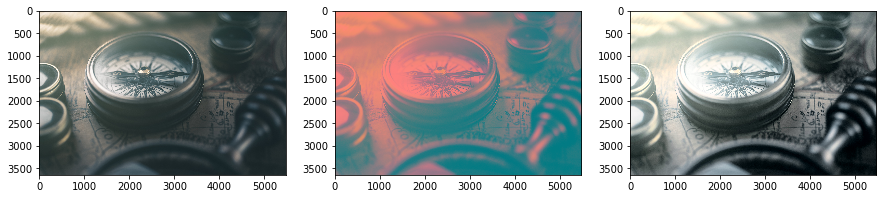

In [16]:
img_yuv = cv2.cvtColor(campass, cv2.COLOR_BGR2YUV)
# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
# convert the YUV image back to RGB format
output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

outputs = [campass, img_yuv, output]

for image_index in range(len(outputs)):
    subplot_index = image_index + 1
    plt.subplot(1, 3, subplot_index)
    plt.imshow(outputs[image_index])